<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=150625580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 51.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=e948462a25ca963d92995bb0cdaddd6dc48e0304f786cb8c867c7c96e9880c82
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

In [3]:
# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158882,1.818907,0.119264,1.897110,14.116234,12.507753,14.599841,17.558670,2.298415,0.637008,...,0.139145,4.185068,3.879685,3.966014,3.762824,0.430111,6.332422,0.455730,0.937302,0.000663
2014-11-25,12.044562,1.819135,0.119668,1.901869,14.117357,12.537065,14.638675,17.612189,2.300905,0.638969,...,0.138814,4.219553,3.880207,3.978962,3.763224,0.430407,6.362609,0.456400,0.940718,0.000661
2014-11-26,12.045241,1.818037,0.119896,1.907586,14.105823,12.535153,14.672870,17.642281,2.297976,0.640026,...,0.138700,4.222921,3.877676,3.999723,3.759247,0.430844,6.383881,0.456573,0.942084,0.000660
2014-11-27,12.057180,1.823885,0.119971,1.903088,14.143228,12.472965,14.664869,17.626582,2.303345,0.638699,...,0.139068,4.218837,3.888066,3.987153,3.769216,0.431591,6.411255,0.457784,0.944582,0.000662
2014-11-28,12.073241,1.829153,0.119494,1.908586,14.197549,12.430126,14.700956,17.679930,2.311237,0.640546,...,0.139808,4.241239,3.902999,3.997058,3.783188,0.432457,6.395869,0.458281,0.948463,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,13.852571,2.766734,0.143106,1.978433,21.646628,15.670180,24.039258,23.150867,2.972781,0.941110,...,0.075500,5.220836,5.946876,4.669549,5.773820,0.609764,0.761339,0.667961,0.591923,0.000888
2023-11-09,13.819650,2.775791,0.143243,1.979674,21.696861,15.691988,24.014059,23.136000,2.978288,0.943549,...,0.075675,5.220737,5.960676,4.660880,5.787682,0.607415,0.762996,0.669512,0.593297,0.000891
2023-11-10,13.804765,2.775944,0.142992,1.982953,21.688714,15.678365,24.014664,23.149734,2.975117,0.944097,...,0.075586,5.238061,5.958438,4.664540,5.785508,0.602799,0.760290,0.669260,0.593074,0.000892


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== MYR ========================================
2023-11-14 05:58:56,661 - Unknown integration target: 
2023-11-14 05:59:03,284 - Unknown integration target: 
2023-11-14 05:59:10,283 - Unknown integration target: 
2023-11-14 05:59:16,842 - Unknown integration target: 
2023-11-14 05:59:23,509 - Unknown integration target: 
2023-11-14 05:59:38,186 - Unknown integration target: 
2023-11-14 05:59:52,996 - Unknown integration target: 
2023-11-14 06:00:07,979 - Unknown integration target: 
2023-11-14 06:00:10,059 - Unknown integration target: 
2023-11-14 06:00:10,063 - Unknown integration target: 
2023-11-14 06:00:18,969 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.8 MiB, max: 263.0 MiB
2023-11-14 06:00:18,973 - ApiComposer - Initial pipeline was fitted in 6.8 sec.
2023-11-14 06:00:18,977 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-14 06:12:57,967 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:38<?, ?gen/s]

2023-11-14 06:12:57,998 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-14 06:13:05,085 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/MYR, sgdr, lagged]}
ridge - {'alpha': 6.394711114699927}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/MYR - {}
sgdr - {}
lagged - {'window_size': 4.611625439869222} 
Initial metric: 0.006
  0%|          | 45/100000 [06:51<326:16:02, 11.75s/trial, best loss: 0.005651331534335565]
2023-11-14 06:21:24,184 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/MYR, sgdr, lagged]}
ridge - {'alpha': 6.394711114699927}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/MYR - {}
sgdr - {}
lagged - {'window_size': 4.611625439869222}
2023-11-14 06:21:24,188 - PipelineTuner - Final metric: 0.006
2023-11-14 06:21:24,194 - ApiComposer - Hyperparameters tuning finished
2023-11-14 06:21:24,594 - ApiComposer - Model generation finished
2023-11-14 06:21:31,789 - FEDOT logger - Final pipeline was fitted
2023-11-14 06:21:31

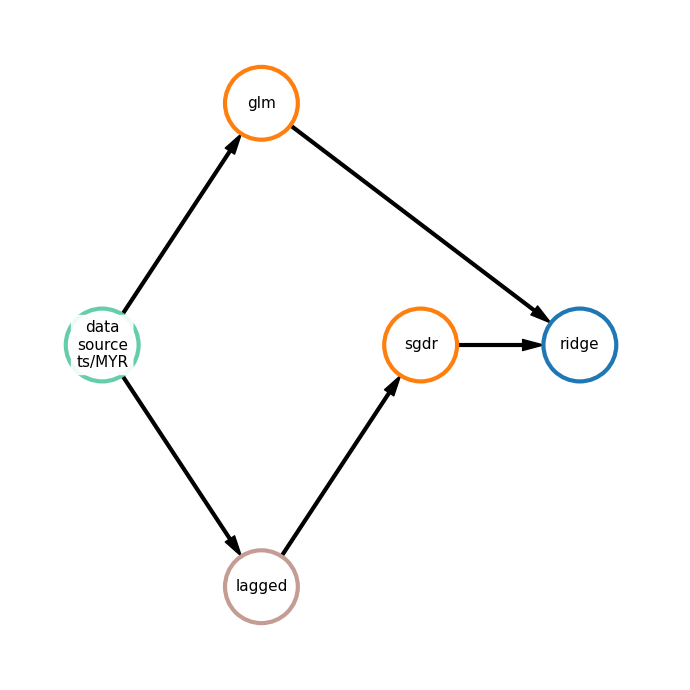

[4.64967008 4.64955405 4.64945325 4.64934512]
{'mae': 0.016, 'mape': 0.003}


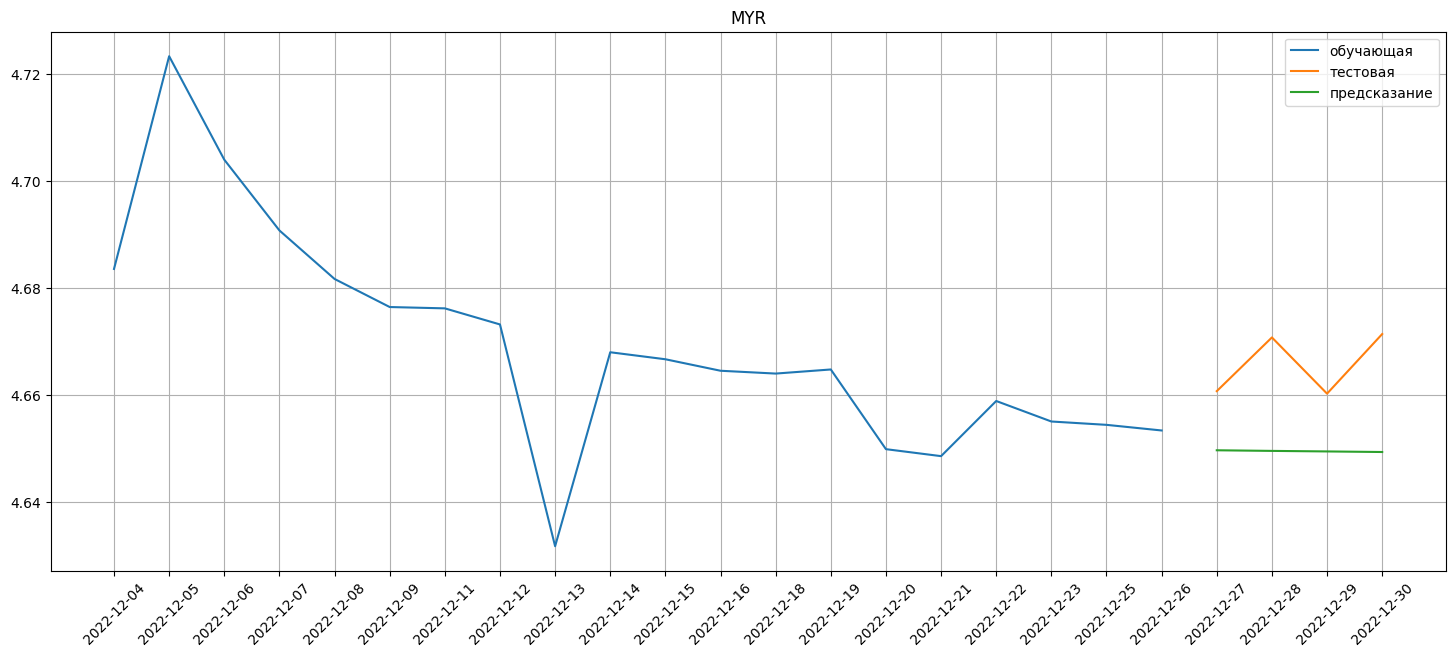


======================================== KRW ========================================
2023-11-14 06:22:19,245 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.4 MiB
2023-11-14 06:22:19,249 - ApiComposer - Initial pipeline was fitted in 11.4 sec.
2023-11-14 06:22:19,261 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 06:22:19,297 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-14 06:24:57,438 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [02:38<?, ?gen/s]

2023-11-14 06:24:57,469 - ApiComposer - Hyperparameters tuning started with 2 min. timeout


2023-11-14 06:25:14,029 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 7, 'nodes': [ridge, ridge, ridge, lagged, data_source_ts/KRW, normalization, arima]}
ridge - {}
ridge - {}
ridge - {}
lagged - {'window_size': 10}
data_source_ts/KRW - {}
normalization - {}
arima - {'p': 2, 'd': 0, 'q': 2} 
Initial metric: 0.000
 80%|████████  | 8/10 [02:25<00:36, 18.15s/trial, best loss: 0.00011142717382227485]
2023-11-14 06:27:39,322 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-14 06:27:56,007 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 7, 'nodes': [ridge, ridge, ridge, lagged, data_source_ts/KRW, normalization, arima]}
ridge - {}
ridge - {}
ridge - {}
lagged - {'window_size': 10}
data_source_ts/KRW - {}
normalization - {}
arima - {'p': 2, 'd': 0, 'q': 2}
2023-11-14 06:27:56,012 - PipelineTuner - Final metric: 0.000
2023-11-14 06:27:56,018 - ApiComposer - Hyperparameters tuning finished
2023-11-14 06:27:56,548 - ApiComposer - Model g

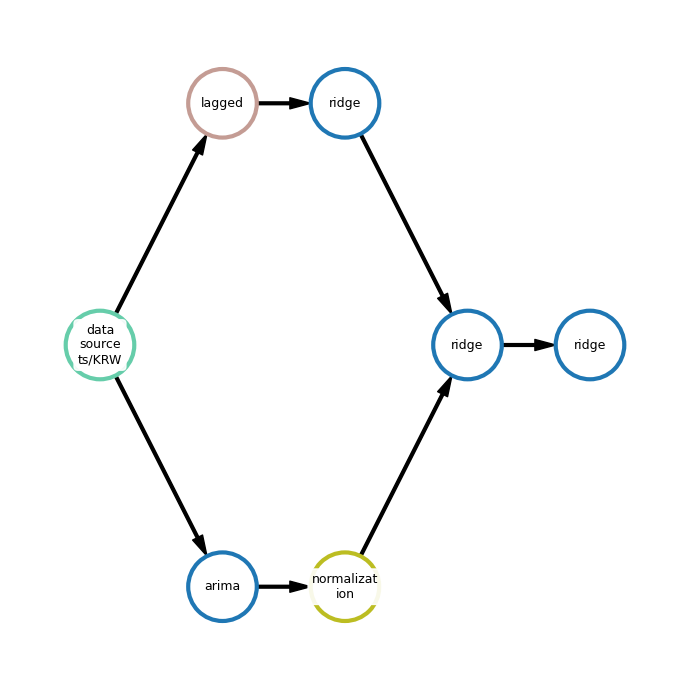

[0.0149369  0.01493769 0.0149385  0.01493929 0.01494012 0.01494092
 0.01494169 0.01494241 0.01494314 0.01494387]
{'mae': 0.0, 'mape': 0.007}


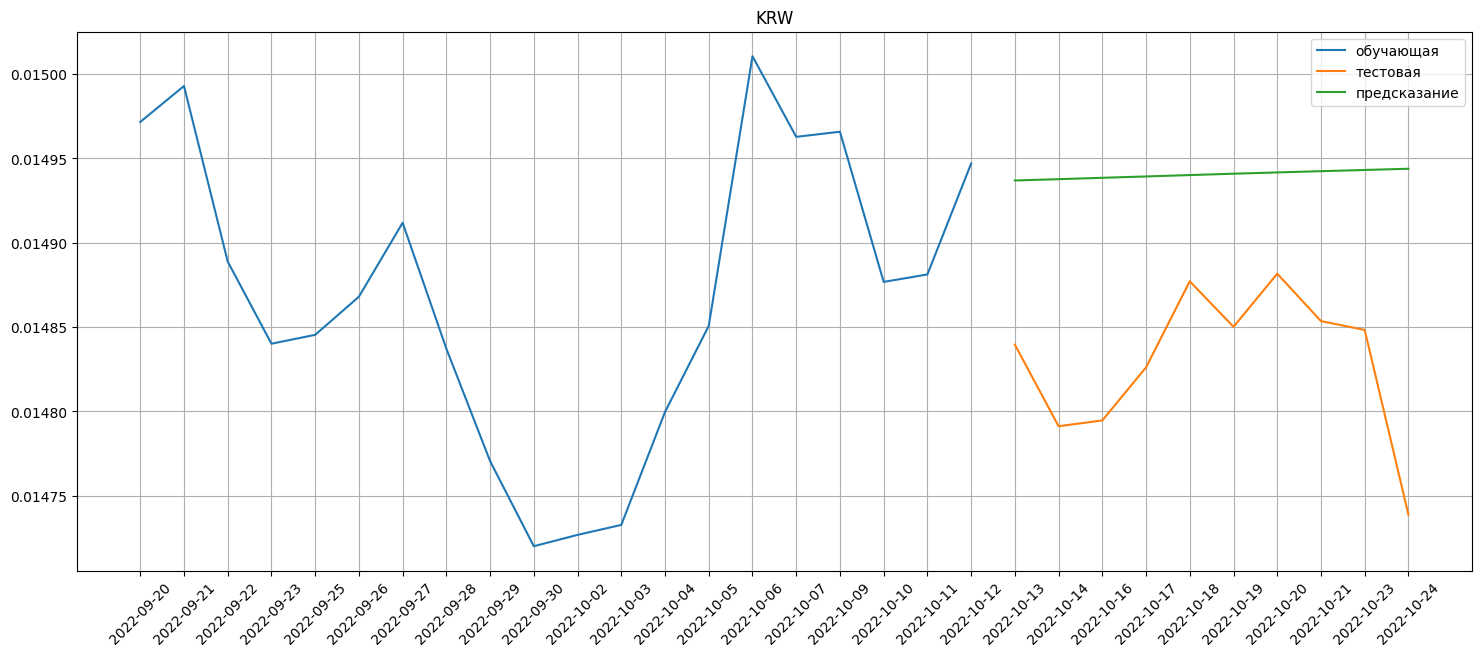


======================================== SAR ========================================
2023-11-14 06:28:26,205 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-14 06:28:26,209 - ApiComposer - Initial pipeline was fitted in 9.8 sec.
2023-11-14 06:28:26,215 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 06:28:26,237 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 59 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-14 07:03:43,239 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [35:16<?, ?gen/s]

2023-11-14 07:03:43,268 - ApiComposer - Hyperparameters tuning started with 24 min. timeout


2023-11-14 07:04:54,965 - PipelineTuner - Initial pipeline: {'depth': 9, 'length': 10, 'nodes': [sgdr, dtreg, ridge, ridge, glm, data_source_ts/SAR, lagged, decompose, linear, decompose]}
sgdr - {}
dtreg - {}
ridge - {'alpha': 9.246211039641832}
ridge - {'alpha': 0.6607373202927926}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/SAR - {}
lagged - {'window_size': 10}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.013
  0%|          | 18/100000 [11:58<2495:00:49, 89.84s/trial, best loss: 0.01764216515860022]
2023-11-14 07:28:56,888 - PipelineTuner - Final pipeline: {'depth': 9, 'length': 10, 'nodes': [sgdr, dtreg, ridge, ridge, glm, data_source_ts/SAR, lagged, decompose, linear, decompose]}
sgdr - {}
dtreg - {}
ridge - {'alpha': 9.246211039641832}
ridge - {'alpha': 0.6607373202927926}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/SAR - {}
lagged - {'window_size': 10}
decompose - {}
linear - {}
decompose - {}
2023-11-14 07:28:56,894 - Pipel

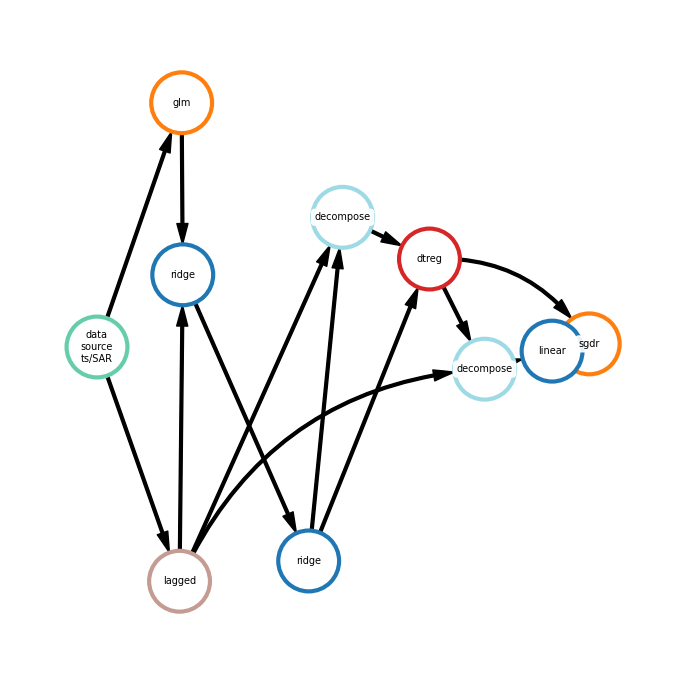

[5.01868392 5.01816559 5.01569719]
{'mae': 0.023, 'mape': 0.005}


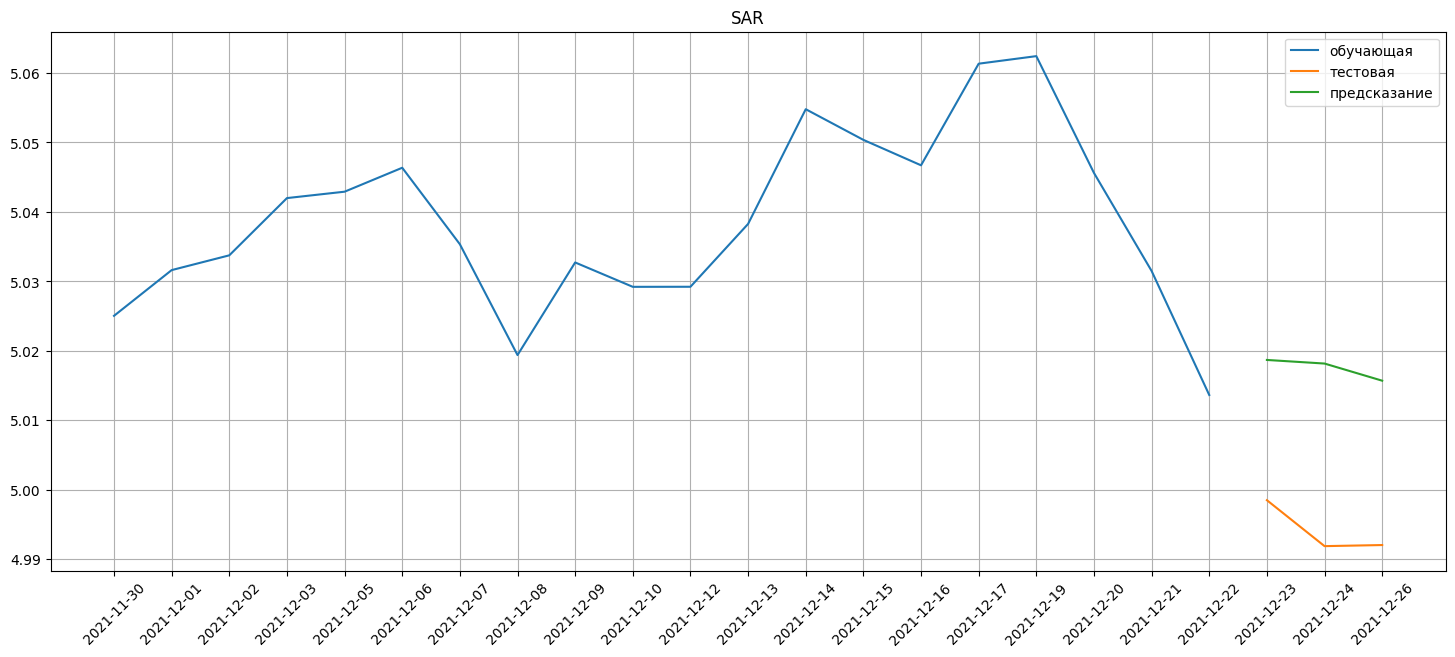


======================================== GBP ========================================
2023-11-14 07:30:29,307 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.1 MiB
2023-11-14 07:30:29,311 - ApiComposer - Initial pipeline was fitted in 7.5 sec.
2023-11-14 07:30:29,316 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 07:30:29,338 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 51 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-14 08:00:23,618 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [29:54<?, ?gen/s]

2023-11-14 08:00:23,649 - ApiComposer - Hyperparameters tuning started with 21 min. timeout


2023-11-14 08:01:18,530 - PipelineTuner - Initial pipeline: {'depth': 10, 'length': 11, 'nodes': [gbr, gbr, ridge, fast_ica, glm, data_source_ts/GBP, ridge, lagged, decompose, linear, decompose]}
gbr - {}
gbr - {}
ridge - {}
fast_ica - {'whiten': 'unit-variance'}
glm - {'family': 'gamma', 'link': 'inverse_power'}
data_source_ts/GBP - {}
ridge - {}
lagged - {'window_size': 10}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.087
  0%|          | 21/100000 [12:11<1847:29:59, 66.52s/trial, best loss: 0.0958244714203371]
2023-11-14 08:24:17,477 - PipelineTuner - Final pipeline: {'depth': 10, 'length': 11, 'nodes': [gbr, gbr, ridge, fast_ica, glm, data_source_ts/GBP, ridge, lagged, decompose, linear, decompose]}
gbr - {'alpha': 0.9453600404462498, 'learning_rate': 0.21047829217358316, 'loss': 'huber', 'max_depth': 7, 'max_features': 0.05348469596434201, 'min_samples_leaf': 18, 'min_samples_split': 10, 'subsample': 0.859591702971015}
gbr - {'alpha': 0.8744354049878337, 'learning_

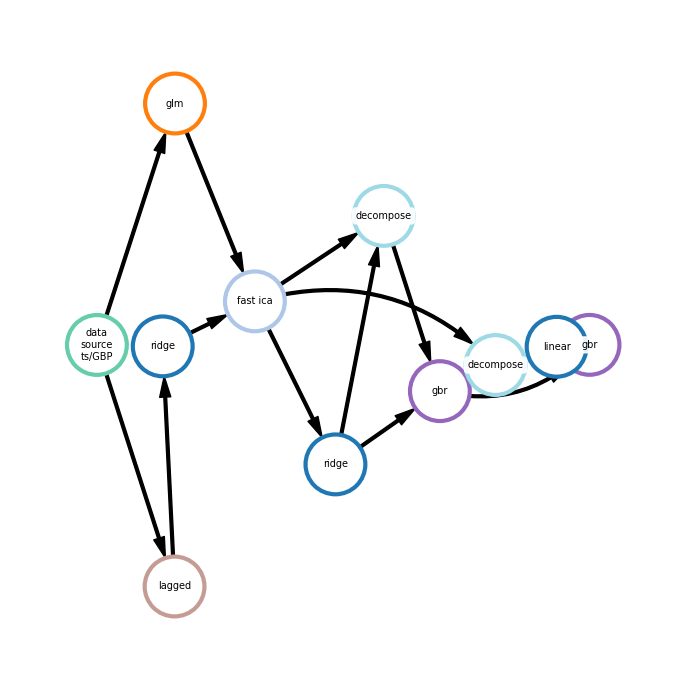

[24.3452205  24.48648794 24.51235292 24.42979269 24.5147637 ]
{'mae': 0.091, 'mape': 0.004}


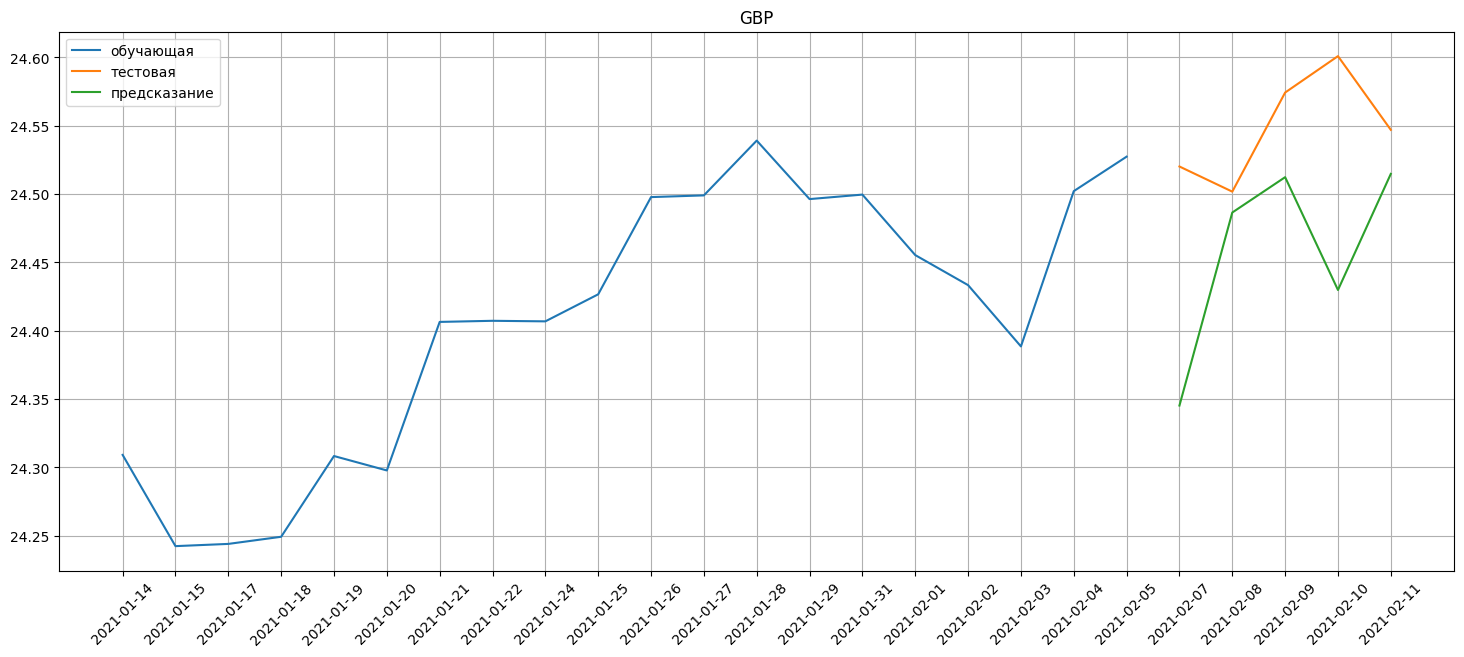


======================================== MYR ========================================
2023-11-14 08:26:22,605 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.2 MiB
2023-11-14 08:26:22,610 - ApiComposer - Initial pipeline was fitted in 13.5 sec.
2023-11-14 08:26:22,614 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 08:26:22,639 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 43 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-14 08:43:11,064 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [16:48<?, ?gen/s]

2023-11-14 08:43:11,099 - ApiComposer - Hyperparameters tuning started with 26 min. timeout


2023-11-14 08:46:16,307 - PipelineTuner - Initial pipeline: {'depth': 14, 'length': 15, 'nodes': [svr, linear, ridge, ridge, ridge, glm, data_source_ts/MYR, ridge, lagged, linear, decompose, linear, decompose, linear, decompose]}
svr - {}
linear - {}
ridge - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/MYR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.029
 80%|████████  | 8/10 [25:58<06:29, 194.82s/trial, best loss: 0.018610550573509535]
2023-11-14 09:12:14,930 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-14 09:15:20,065 - PipelineTuner - Final pipeline: {'depth': 14, 'length': 15, 'nodes': [svr, linear, ridge, ridge, ridge, glm, data_source_ts/MYR, ridge, lagged, linear, decompose, linear, decompose, linear, decompose]}
svr - {'C': 13.782342626200931, 'epsilon': 0.08242648338372552, 'loss': 'epsilon_insen

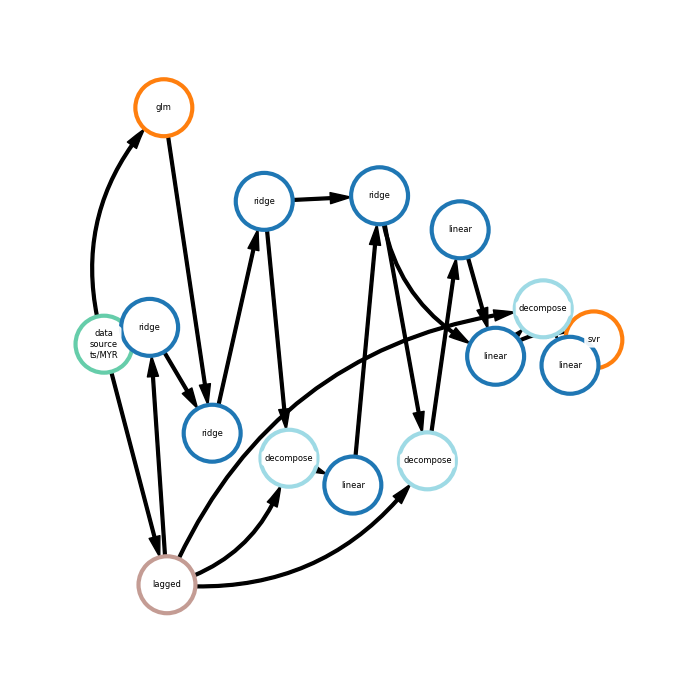

[4.78839865 4.79643686 4.86053904]
{'mae': 0.024, 'mape': 0.005}


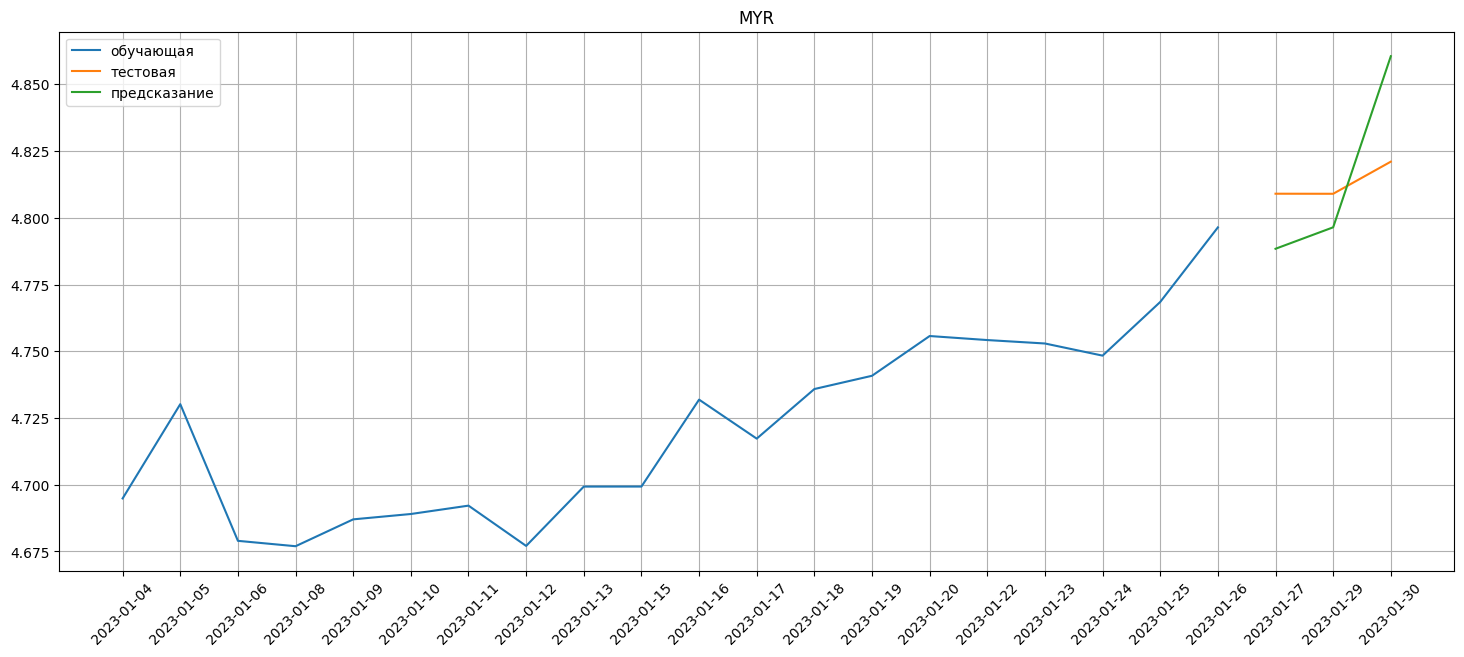


======================================== GBP ========================================
2023-11-14 09:19:11,207 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.3 MiB
2023-11-14 09:19:11,211 - ApiComposer - Initial pipeline was fitted in 7.3 sec.
2023-11-14 09:19:11,215 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 09:19:11,234 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 57 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-14 09:53:27,247 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [34:15<?, ?gen/s]

2023-11-14 09:53:27,277 - ApiComposer - Hyperparameters tuning started with 23 min. timeout


2023-11-14 09:55:21,514 - PipelineTuner - Initial pipeline: {'depth': 13, 'length': 14, 'nodes': [lgbmreg, lgbmreg, dtreg, ridge, ridge, glm, data_source_ts/GBP, lagged, linear, pca, linear, decompose, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
dtreg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/GBP - {}
lagged - {'window_size': 10}
linear - {}
pca - {'svd_solver': 'full', 'n_components': 0.7}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.112
  0%|          | 12/100000 [04:28<3724:20:12, 134.09s/trial, best loss: 0.12464793304576251]
2023-11-14 10:21:08,917 - PipelineTuner - Final pipeline: {'depth': 13, 'length': 14, 'nodes': [lgbmreg, lgbmreg, dtreg, ridge, ridge, 

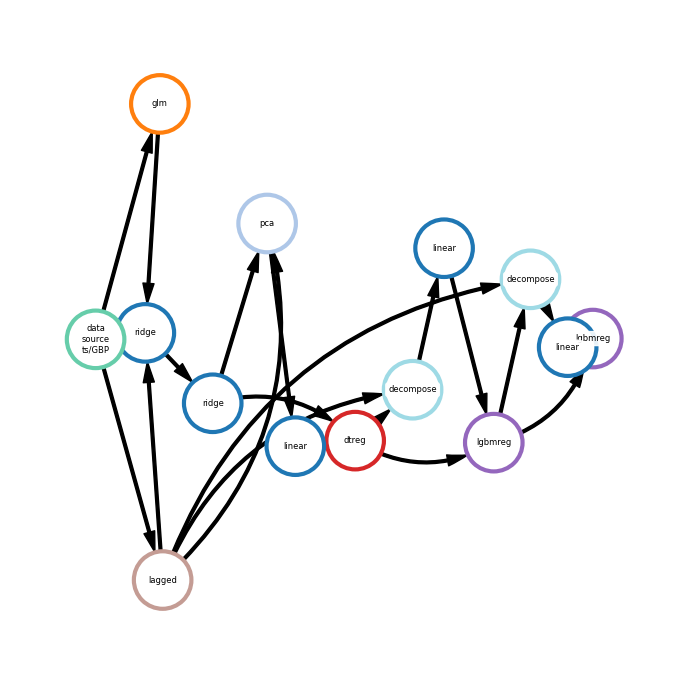

[23.76515796 23.73269904 23.74766153 23.82973762 23.742548   23.62054587
 23.58928811]
{'mae': 0.36, 'mape': 0.015}


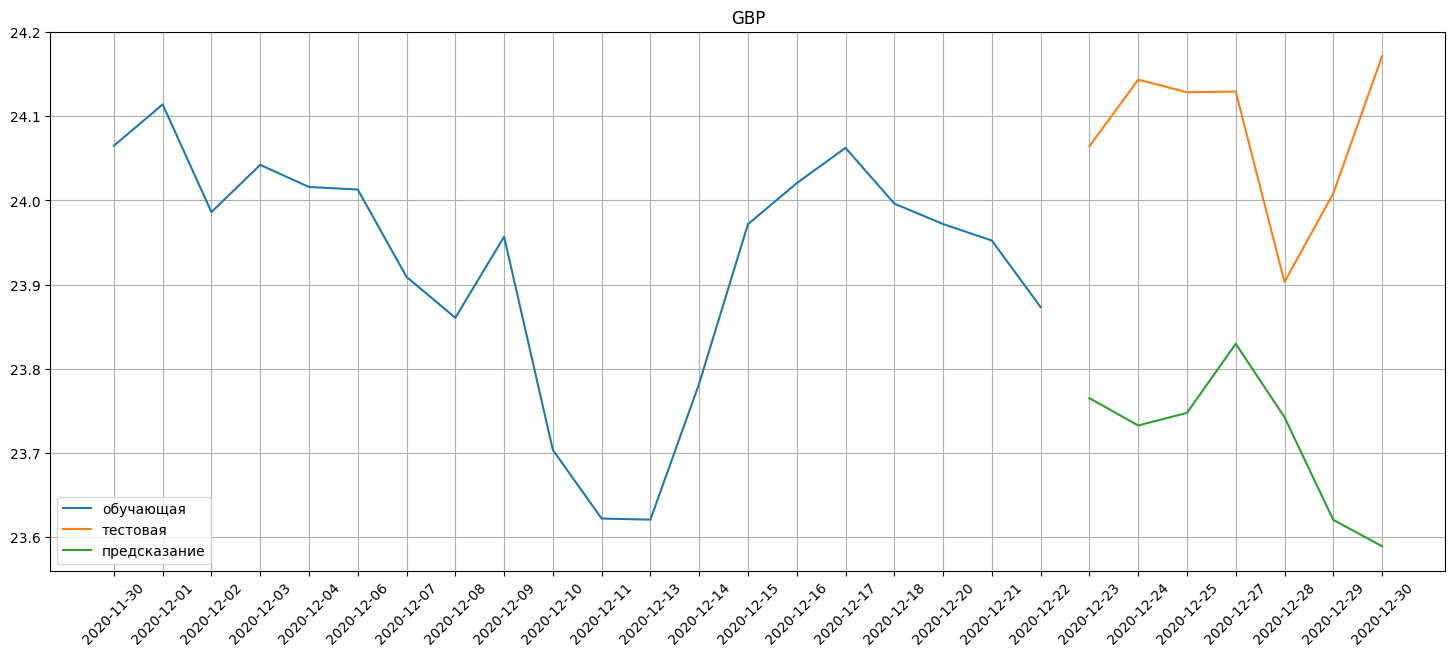


======================================== AUD ========================================
2023-11-14 10:24:15,676 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 5.2 MiB
2023-11-14 10:24:15,680 - ApiComposer - Initial pipeline was fitted in 16.2 sec.
2023-11-14 10:24:15,693 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-14 10:24:15,730 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 20 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'polyfit', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'rfr', 'lasso', 'normalization', 'lagged', 'cut', 'dtreg', 'ransac_non_lin_reg', 'polyfit', 'locf', 'gaussian_filter', 'sparse_lagged', 'glm', 'ets', 'ridge', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'diff_filter', 'linear', 'pca', 'ar', 'sgdr', 'adareg', 'scaling'].
2023-11-1

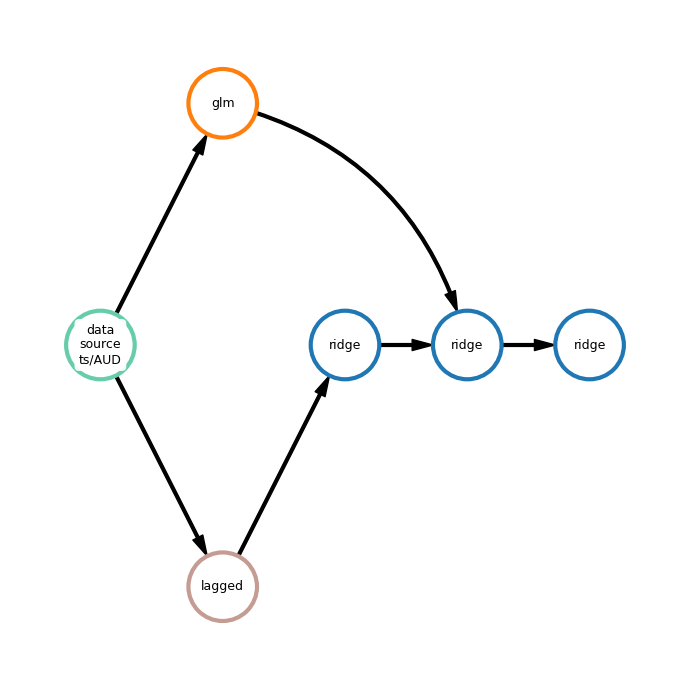

[13.77706996 13.77984657 13.7816227  13.78253636 13.78273861 13.78284856
 13.78347208 13.78557969 13.7898532  13.79663875 13.80546778 13.81544616
 13.82607996 13.83648801 13.84564589 13.85295977 13.85782629 13.86043323
 13.86111993]
{'mae': 0.288, 'mape': 0.02}


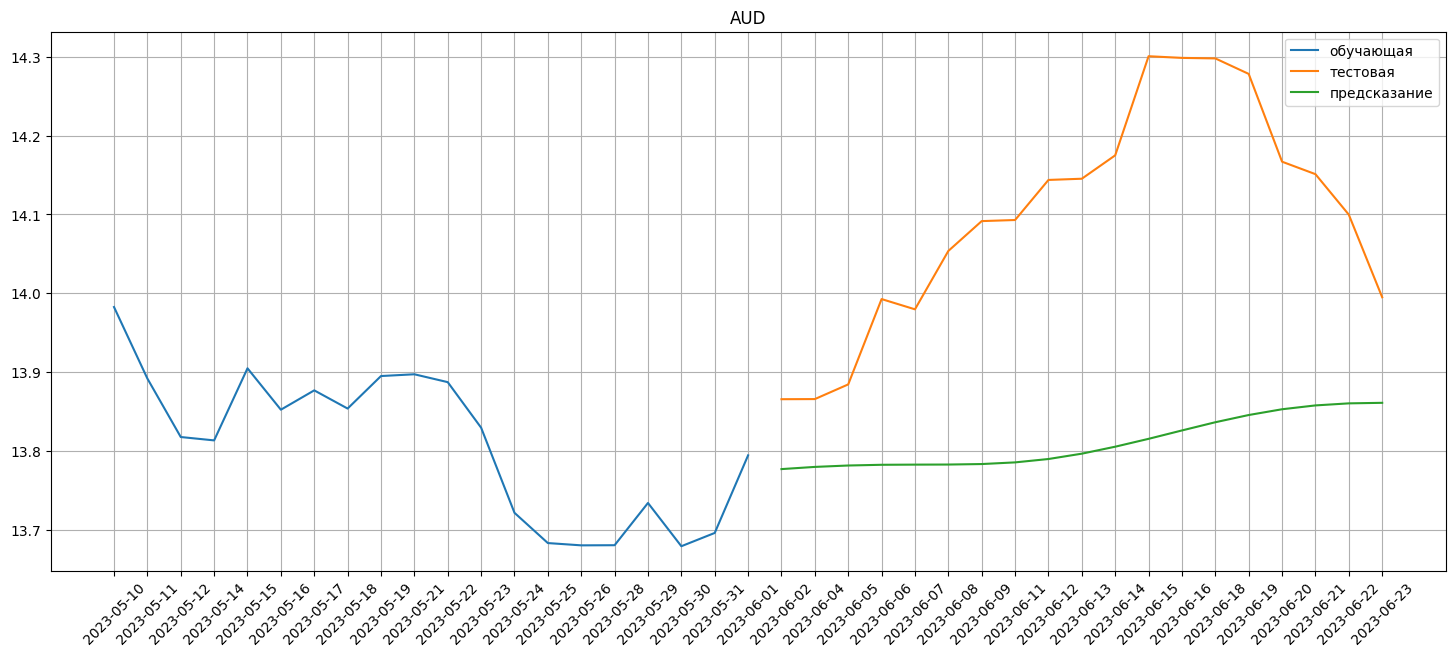


======================================== PEN ========================================
2023-11-14 10:44:49,564 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-14 10:44:49,568 - ApiComposer - Initial pipeline was fitted in 11.4 sec.
2023-11-14 10:44:49,571 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 10:44:49,590 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 34 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-14 11:05:18,450 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [20:28<?, ?gen/s]

2023-11-14 11:05:18,477 - ApiComposer - Hyperparameters tuning started with 13 min. timeout


2023-11-14 11:05:29,312 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, glm, data_source_ts/PEN, dtreg, lgbmreg, lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PEN - {}
dtreg - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
lagged - {'window_size': 10} 
Initial metric: 0.017
  0%|          | 50/100000 [11:27<477:01:17, 17.18s/trial, best loss: 0.00978160010553243]
2023-11-14 11:19:06,952 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, glm, data_source_ts/PEN, dtreg, lgbmreg, lagged]}
ridge - {'alpha': 4.1488117569761265}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/PEN - {}
dtreg - {'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 6}
lgbmreg - {'num_leaves': 71, 'colsample_bytree': 0.40857641674994766, 'subsample': 0.9948216010772731, 'subsample_freq': 10, 'learn

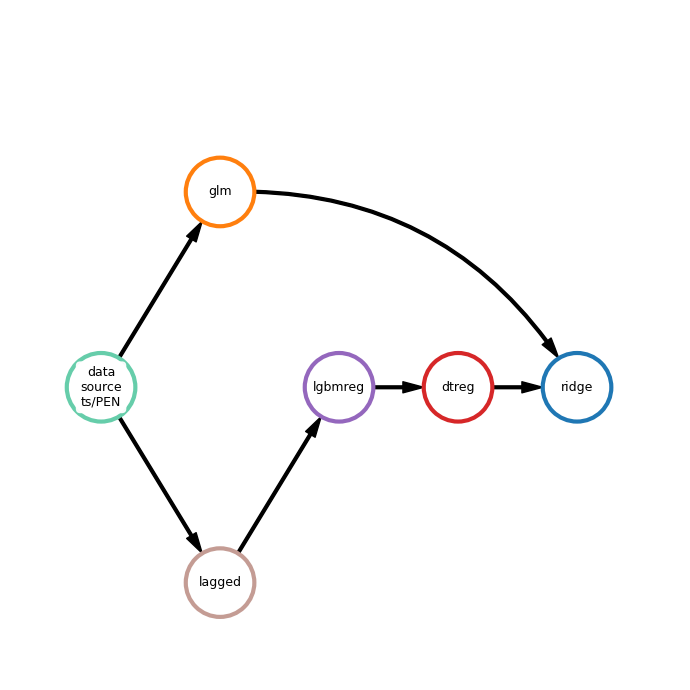

[5.12839421 5.12864467]
{'mae': 0.005, 'mape': 0.001}


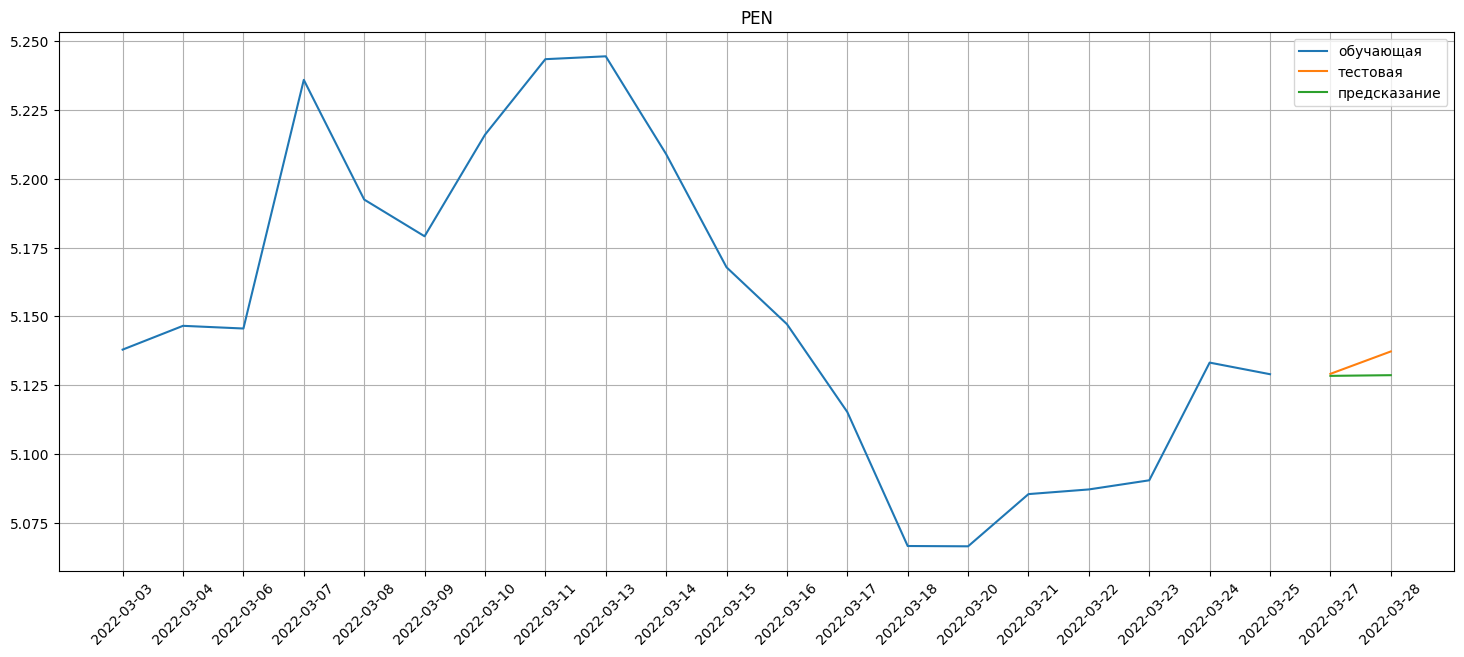


======================================== RON ========================================
2023-11-14 11:19:40,713 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.5 MiB
2023-11-14 11:19:40,723 - ApiComposer - Initial pipeline was fitted in 7.6 sec.
2023-11-14 11:19:40,727 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 11:19:40,754 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 17 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-14 11:28:27,694 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [08:46<?, ?gen/s]

2023-11-14 11:28:27,723 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-14 11:28:55,675 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [gbr, ridge, ridge, glm, data_source_ts/RON, ridge, lagged, linear, decompose]}
gbr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RON - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.017
  0%|          | 16/100000 [03:31<979:48:12, 35.28s/trial, best loss: 0.019409131859266234] 
2023-11-14 11:37:06,999 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [gbr, ridge, ridge, glm, data_source_ts/RON, ridge, lagged, linear, decompose]}
gbr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RON - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-14 11:37:07,009 - PipelineTuner - Final metric: 0.017
2023-11-14 11:37:07,017 - ApiComposer - Hyperparameters tuning finished
2023-11-14 11:37:07,505 - ApiComposer - Model generation fin

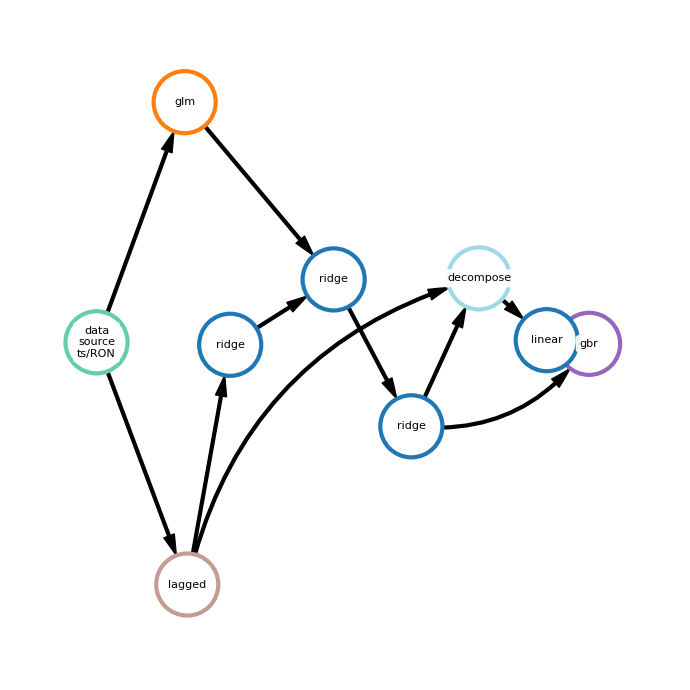

[4.44702875 4.44598618 4.4452424  4.44747982 4.45046453 4.44974811
 4.44818607 4.44701274]
{'mae': 0.005, 'mape': 0.001}


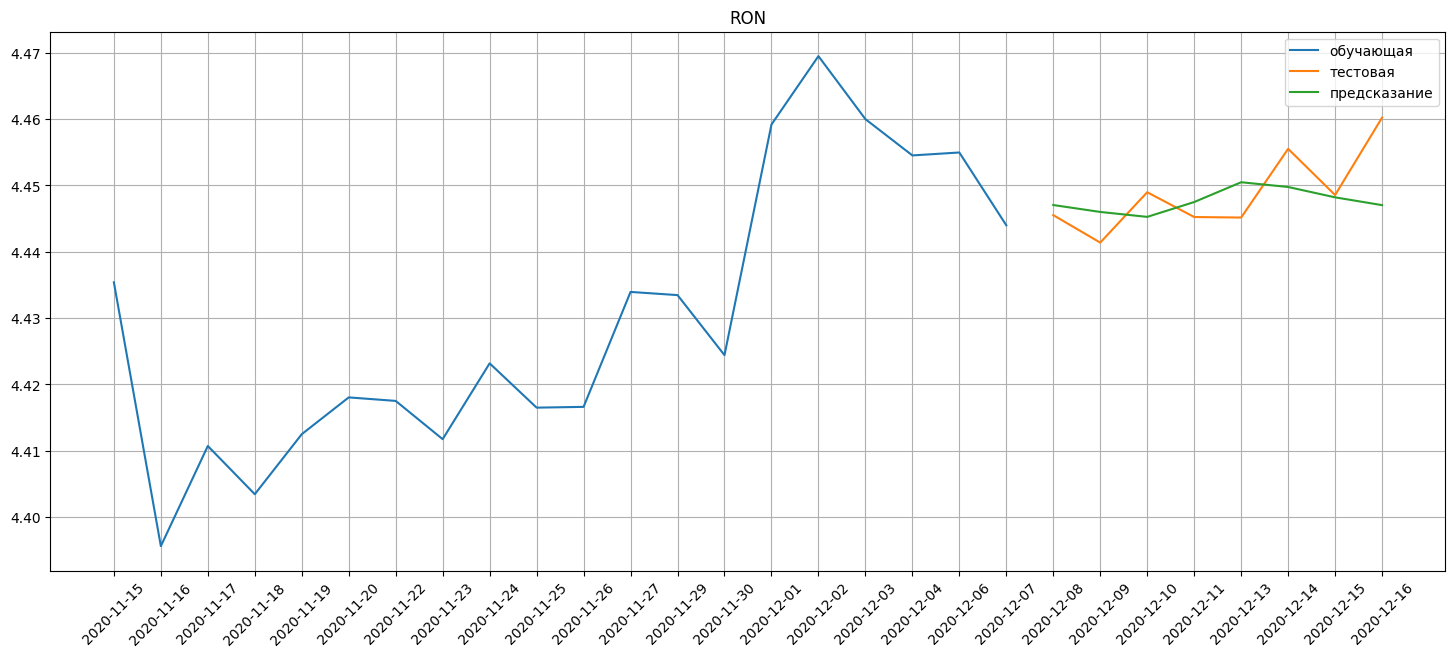


======================================== AUD ========================================
2023-11-14 11:37:50,515 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 1.8 MiB
2023-11-14 11:37:50,519 - ApiComposer - Initial pipeline was fitted in 8.4 sec.
2023-11-14 11:37:50,523 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-14 11:37:50,541 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 48 min. Set of candidate models: ['ts_naive_average', 'smoothing', 'lagged', 'cut', 'arima', 'stl_arima', 'polyfit', 'clstm', 'locf', 'gaussian_filter', 'sparse_lagged', 'ar', 'glm', 'diff_filter', 'ets', 'fast_ica', 'lasso', 'normalization', 'cut', 'lgbmreg', 'ransac_non_lin_reg', 'polyfit', 'exog_ts', 'gaussian_filter', 'gbr', 'ets', 'isolation_forest_reg', 'ransac_lin_reg', 'ts_naive_average', 'smoothing', 'linear', 'pca', 'arima', 'stl_arima', 'clstm',

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-14 11:57:58,700 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [20:08<?, ?gen/s]

2023-11-14 11:57:58,722 - ApiComposer - Hyperparameters tuning started with 28 min. timeout


2023-11-14 11:58:04,481 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/AUD, ridge, lagged]}
ridge - {'alpha': 6.980298815567015}
ridge - {'alpha': 8.849605113721497}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/AUD - {}
ridge - {'alpha': 8.787204813375512}
lagged - {'window_size': 2.9250987063142526} 
Initial metric: 0.036
  0%|          | 198/100000 [26:42<236:21:15,  8.53s/trial, best loss: 0.03064216629571673]
2023-11-14 12:25:56,576 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/AUD, ridge, lagged]}
ridge - {'alpha': 9.756119691370783}
ridge - {'alpha': 1.6792832271951563}
glm - {'family': 'gamma', 'link': 'inverse_power'}
data_source_ts/AUD - {}
ridge - {'alpha': 6.3243170386638585}
lagged - {'window_size': 261}
2023-11-14 12:25:56,579 - PipelineTuner - Final metric: 0.031
2023-11-14 12:25:56,588 - ApiComposer - Hyperparameters tuning finished
2023

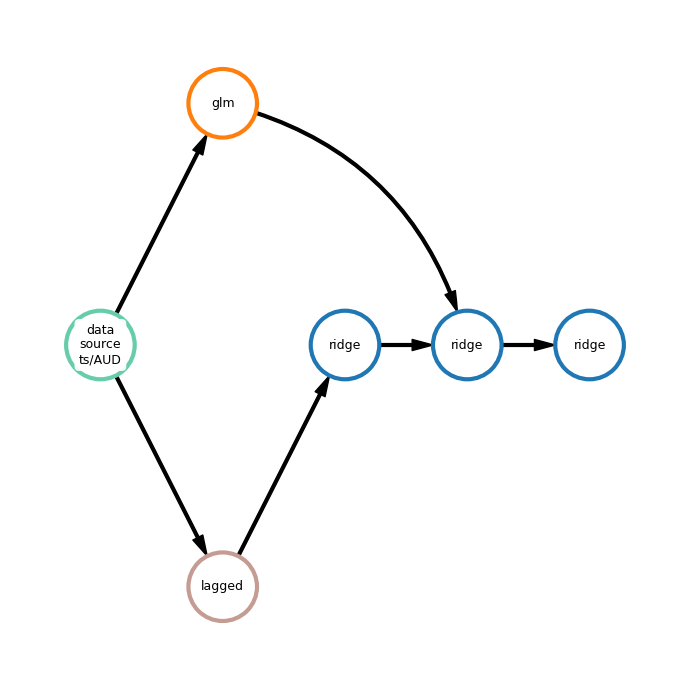

[13.78903382 13.78549946]
{'mae': 0.024, 'mape': 0.002}


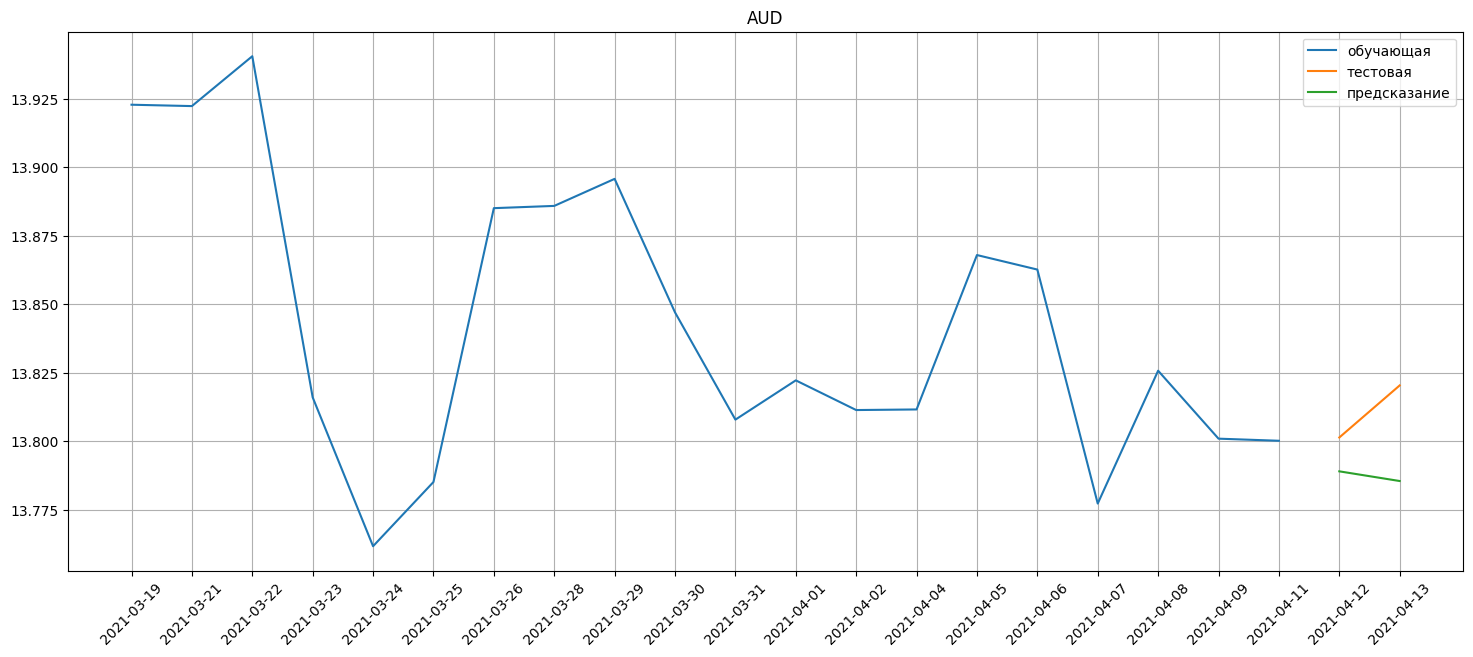

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
135,"(2023, 11, 14, 9, 19, 0, 1, 318, 0)",GBP,7,898,57,0.015
136,"(2023, 11, 14, 10, 23, 15, 1, 318, 0)",AUD,19,122,20,0.020
137,"(2023, 11, 14, 10, 44, 37, 1, 318, 0)",PEN,2,510,34,0.001
138,"(2023, 11, 14, 11, 19, 29, 1, 318, 0)",RON,8,910,17,0.001


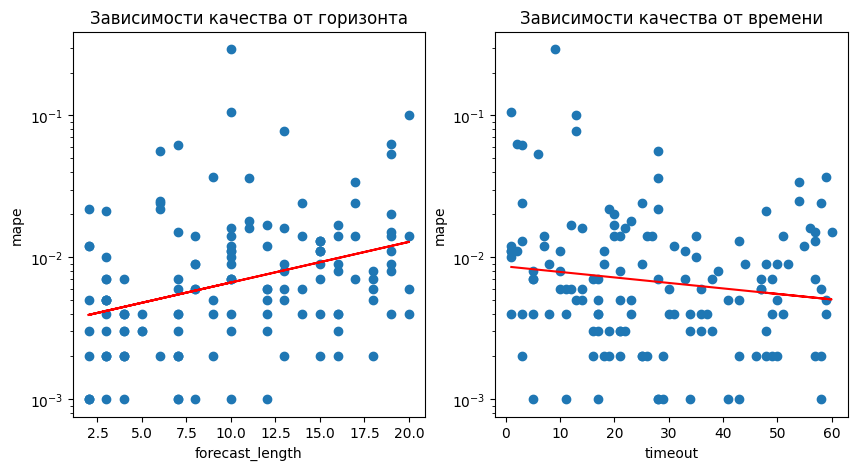

In [9]:
def get_trend(x,y):
    slope, intercept = np.polyfit(x, np.log(y), 1)
    line = np.exp(slope * x + intercept)
    return line

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

line = get_trend(rep['forecast_length'],rep['mape'])
ax[0].plot(rep['forecast_length'],get_trend(rep['forecast_length'],rep['mape']),color='red')


ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

line = get_trend(rep['timeout'],rep['mape'])
ax[1].plot(rep['timeout'],get_trend(rep['timeout'],rep['mape']),color='red')

plt.show()